In [1]:
import numpy as np   
import math
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.atlas import *
import random
from utils import SIR_net, SIR_net_adaptive, SIR_net_adaptive2

19900

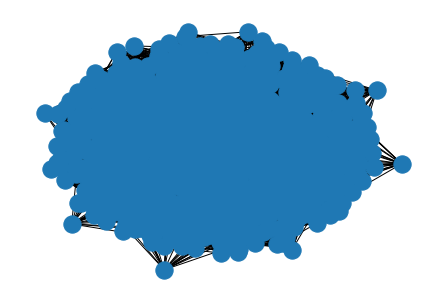

In [2]:
N= 1000 #number of nodes 
p= 0.004  #edge probability
ERG= nx.erdos_renyi_graph(N, p)
ERG2 = nx.erdos_renyi_graph(N, 10*p)
nx.draw(ERG2)
len(nx.edges(ERG2))

Text(0.5, 0, 'time')

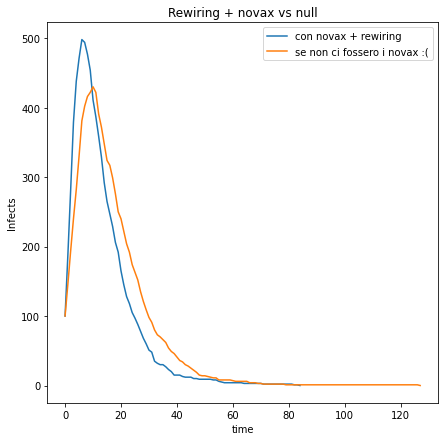

In [3]:
b = SIR_net(ERG, 0.15, 0.1, initial_infecteds=np.arange(100))
a = SIR_net_adaptive(ERG,ERG2, beta=0.15, mu=0.1, r=0.1, h=0.1, pro=0.1, initial_infecteds=np.arange(100), initial_no_vax = np.arange(200,400))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
ax.plot(a[0],a[2], label= "con novax + rewiring")
ax.plot(b[0],b[2], label= "se non ci fossero i novax :(")
ax.legend()
ax.set_title("Rewiring + novax vs null")
ax.set_ylabel("Infects")
ax.set_xlabel("time")

No Vax?

17150

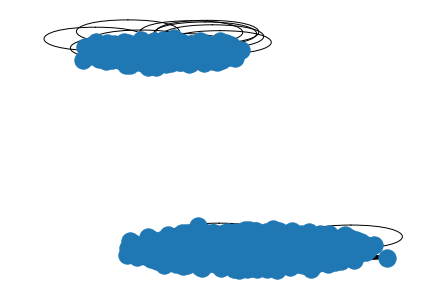

In [4]:
#dopo 20 iterazioni 
nx.draw(ERG2)
len(nx.edges(ERG2))

17150

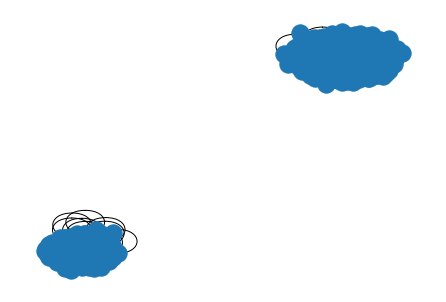

In [5]:
# a fine epidemia

nx.draw(ERG2)
len(nx.edges(ERG2))

Tentativo di Gridsearch

In [6]:
# 600 sec circa

r=np.arange(1,10)/10
h=np.arange(1,10)/10

out1 = np.zeros((len(r),len(h)))

out2 = np.zeros((len(r),len(h)))
               
for i in range(len(r)):
    for j in range(len(h)):
        
        out1[i][j] = SIR_net_adaptive2(G = ERG, NET = ERG2, beta = 0.15, mu = 0.1, pro = 0.1,
                                      initial_infecteds=np.arange(100), initial_no_vax = np.arange(200,400),
                                      r = r[i], h = h[j])[0]
        
        
        out2[i][j] = SIR_net_adaptive2(G = ERG, NET = ERG2, beta = 0.15, mu = 0.1, pro = 0.1,
                                      initial_infecteds=np.arange(100), initial_no_vax = np.arange(200,400),
                                      r = r[i], h = h[j])[1]

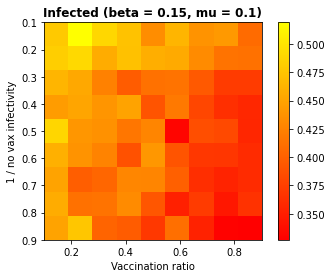

In [7]:
a = plt.imshow( out1 , cmap = 'autumn' , interpolation = 'nearest', extent = [min(r), max(r),max(h), min(h)] )
plt.colorbar(a)
plt.title('Infected (beta = 0.15, mu = 0.1)', fontweight ="bold")
plt.xlabel("Vaccination ratio")
plt.ylabel("1 / no vax infectivity")
plt.show()

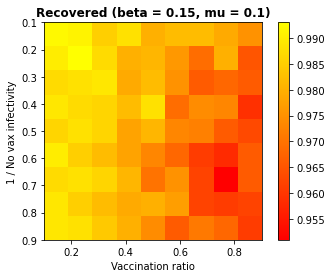

In [8]:
b = plt.imshow( out2 , cmap = 'autumn' , interpolation = 'nearest', extent = [min(r), max(r),max(h), min(h)] )
plt.colorbar(b)
plt.title('Recovered (beta = 0.15, mu = 0.1)', fontweight ="bold")
plt.xlabel("Vaccination ratio")
plt.ylabel("1 / No vax infectivity")
plt.show()
 